#Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

Que 1 - 1] Dataset:- CocaCola_Sales_Rawdata

In [280]:
# import library:-

In [281]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [282]:
# Import Data:-

In [283]:
sales_data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
sales_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [284]:
# Data Understanding:--

In [285]:
sales_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [286]:
sales_data.shape

(42, 2)

In [287]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [288]:
sales_data.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [289]:
sales_data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [290]:
sales_data.dtypes

Quarter     object
Sales      float64
dtype: object

In [291]:
sales_data.columns

Index(['Quarter', 'Sales'], dtype='object')

In [292]:
temp = sales_data.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
sales_data['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
sales_data.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [293]:
sales_data = sales_data.drop(['Quarter'], axis = 1)
sales_data.reset_index(inplace=True)
sales_data['quater'] = pd.to_datetime(sales_data['quater'])
sales_data = sales_data.set_index('quater')
sales_data.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


In [294]:
# Visualization using Lineplot for Sales :-

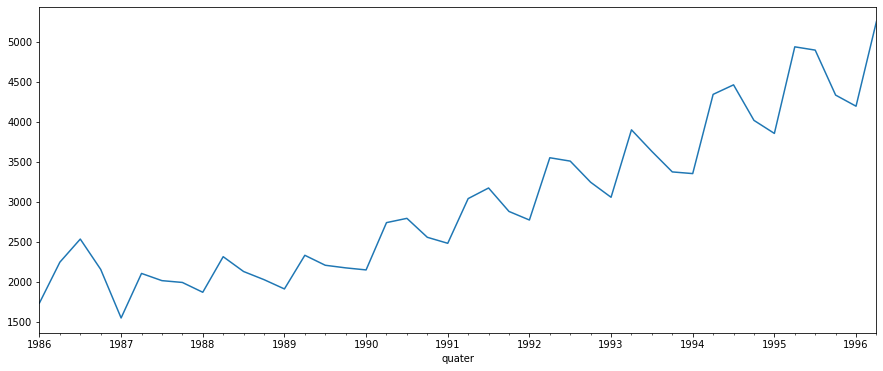

In [295]:
sales_data['Sales'].plot(figsize = (15, 6))
plt.show()

Moving Average Method :-

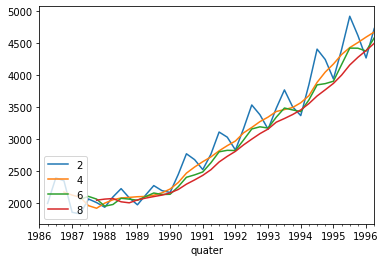

In [296]:
for i in range(2,10,2):
    sales_data["Sales"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 3)
plt.show()

In [297]:
 # Time series decomposition plot :-

In [298]:
from statsmodels.tsa.seasonal import seasonal_decompose

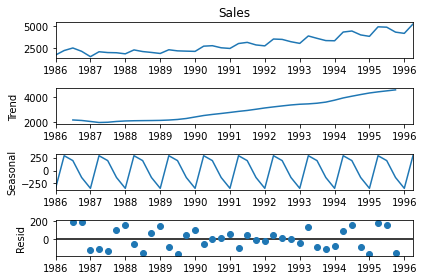

In [299]:
ts_add = seasonal_decompose(sales_data.Sales,model = "additive")
fig = ts_add.plot()
plt.show()

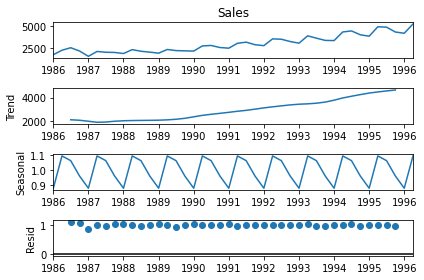

In [300]:
ts_mul = seasonal_decompose(sales_data.Sales,model = "multiplicative")
fig = ts_mul.plot()
plt.show()

In [301]:
# Visualization using TSA Plot :--

In [302]:
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models

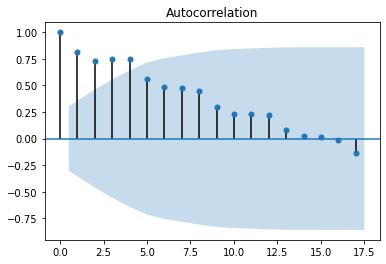

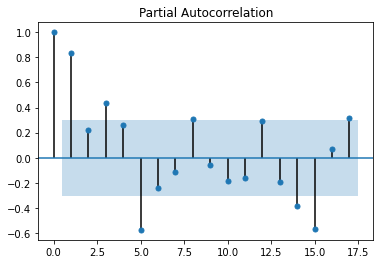

In [303]:
tsa_plots.plot_acf(sales_data.Sales)

tsa_plots.plot_pacf(sales_data.Sales)

plt.show()

# Evaluation Metric RMSE:-

In [304]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [305]:
#Splitting Data :--

In [306]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [307]:
Train = sales_data.head(30)
Test = sales_data.tail(12)

In [308]:
# Simple Exponential Method :::--

In [309]:
simple_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_simple_model = simple_model.predict(start = Test.index[0],end = Test.index[-1])

In [310]:
rmse_simple_model = RMSE(Test.Sales, pred_simple_model)
print('RMSE Value of Simple Exponential :',rmse_simple_model)

RMSE Value of Simple Exponential : 862.9139516522648


In [311]:
# Holt method :--

In [312]:
holt_model = Holt(Train["Sales"]).fit()
pred_holt_model = holt_model.predict(start = Test.index[0],end = Test.index[-1])

In [313]:
rmse_holt_model = RMSE(Test.Sales, pred_holt_model)
print('RMSE Value of Holt :',rmse_holt_model)

RMSE Value of Holt : 518.1409301044574


In [314]:
#  Holts winter exponential smoothing with additive seasonality and additive trend :::--

In [315]:
holt_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal = "add",trend = "add",seasonal_periods = 4).fit()
pred_holt_add_add = holt_model_add_add.predict(start = Test.index[0],end = Test.index[-1])

In [316]:
rmse_holt_add_add_model = RMSE(Test.Sales, pred_holt_add_add)
print('RMSE Value of Holts add and add :',rmse_holt_add_add_model)

RMSE Value of Holts add and add : 244.64575367464985


In [317]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend::-

In [319]:
holt_model_multi_add = ExponentialSmoothing(Train["Sales"],seasonal = "mul",trend = "add",seasonal_periods = 4).fit() 
pred_holt_multi_add = holt_model_multi_add.predict(start = Test.index[0],end = Test.index[-1])

In [318]:
rmse_holt_model_multi_add_model = RMSE(Test.Sales, pred_holt_multi_add)
print('RMSE Value of Holts Multi and add :',rmse_holt_model_multi_add_model)

RMSE Value of Holts Multi and add : 3980.668411549179


#  Model based Forecasting Methods ::-

In [320]:
# Data preprocessing for models ::-

In [321]:
sales_data_1 = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
sales_data_1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [322]:
sales_data_2 = pd.get_dummies(sales_data_1, columns = ['Quarter'])
sales_data_2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1',
                        'Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2',
                        'Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3',
                        'Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [323]:
sales_data_2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [324]:
t = np.arange(1,43)
sales_data_2['t'] = t
sales_data_2['t_squared'] = sales_data_2['t']*sales_data_2['t']
log_Sales = np.log(sales_data_2['Sales'])

In [325]:
sales_data_2['log_Sales'] = log_Sales
sales_data_2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_squared,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [326]:
#  Splitting Data ::-

In [327]:
train, test = np.split(sales_data_2, [int(.67 *len(sales_data_2))])

#Model Building | Training | Testing :-

In [328]:
Train = sales_data_2.head(32)
Test  = sales_data_2.tail(10)

1]  Linear Model ::-

In [329]:
import statsmodels.formula.api as smf 

In [330]:
linear_model = smf.ols('Sales~t',data = train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))

In [331]:
rmse_linear_model = RMSE(test['Sales'], pred_linear)
print('RMSE Value of Linear :',rmse_linear_model)

RMSE Value of Linear : 750.4020694454618


3] Quadratic Model::-

In [332]:
Quad_model= smf.ols('Sales~t+t_squared',data = train).fit()
pred_Quad = pd.Series(Quad_model.predict(test[["t","t_squared"]]))

In [333]:
rmse_Quad_model = RMSE(test['Sales'], pred_Quad)
print('RMSE Value of Quadratic :',rmse_Quad_model)

RMSE Value of Quadratic : 783.7297975037552


3] Exponential Model :

In [334]:
Exp_model = smf.ols('log_Sales~t',data = train).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(test['t'])))

In [335]:
rmse_Exp_model = RMSE(test['Sales'], np.exp(pred_Exp))
print('RMSE Value of Exponential :',rmse_Exp_model)

RMSE Value of Exponential : 588.1405104900199


4] Additive seasonality model :::-

In [336]:
additive_model =  smf.ols('Sales~ Q1+Q2+Q3+Q4',data = train).fit()
pred_additive = pd.Series(additive_model.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))

In [337]:
rmse_additive_model = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_additive))**2))
print('RMSE Value of Additive :',rmse_additive_model)

RMSE Value of Additive : 1869.7188209186959


In [338]:
additive = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predadd = pd.Series(additive.predict(Test[['Q1','Q2','Q3','Q4']]))
rmseadd = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predadd))**2))
rmseadd

1949.398757439045

5] Additive seasonality with Linear Model ::--

In [339]:
additive_linear_model = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_additive_linear = pd.Series(additive_linear_model.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))

In [340]:
rmse_additive_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_additive_linear))**2))
print('RMSE Value of Additive Linear :',rmse_additive_linear)

RMSE Value of Additive Linear : 596.1526282372297


6]  Additive seasonality with Quadratic Model ::-

In [341]:
additive_quad_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data = train).fit()
pred_additive_quad = pd.Series(additive_quad_model.predict(pd.DataFrame(test[['t','t_squared','Q1','Q2','Q3','Q4']])))

In [342]:
rmse_additive_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_additive_quad))**2))
print('RMSE Value of Additive Quadratic :',rmse_additive_quad)

RMSE Value of Additive Quadratic : 412.11444360537337


8] Multiplicative seasonality with Linear Model ::-

In [343]:
multi_linear_model = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_multi_linear = pd.Series(multi_linear_model.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))

In [344]:
rmse_multi_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_multi_linear)))**2))
print('RMSE Value of Multi Linear :',rmse_multi_linear)

RMSE Value of Multi Linear : 5359.687911933238


9] Multiplicative seasonality with  Quadratic Model ::-

In [345]:
multi_quad_model = smf.ols('log_Sales~t+t_squared+Q1+Q2+Q3+Q4',data = train).fit()
pred_multi_quad = pd.Series(multi_quad_model.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))

In [346]:
rmse_multi_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_multi_quad)))**2))
print('RMSE Value of Multi Quadratic :',rmse_multi_quad)

RMSE Value of Multi Quadratic : 3630.561946734775


Compare RMSE Value :-

In [347]:
list = [['Linear Model',rmse_linear_model],['Exponential model',rmse_Exp_model],['Quadratic model',rmse_Quad_model],
          ['Additive Model',rmse_additive_model],['Additive Linear Model',rmse_additive_linear],
          ['Additive Qudratic Model',rmse_additive_quad],['Muli Linear Model',rmse_multi_linear],
          ['Multi Quadratic Model',rmse_multi_quad]]

In [348]:
df = pd.DataFrame(list, columns = ['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Linear Model,750.402069
1,Exponential model,588.140510
2,Quadratic model,783.729798
3,Additive Model,1869.718821
4,Additive Linear Model,596.152628
5,Additive Qudratic Model,412.114444
6,Muli Linear Model,5359.687912
7,Multi Quadratic Model,3630.561947


From above table we can see RMSE for Additive Qudratic Model giving less value, so that is best model

# Que 2 - Dataset - Airlines-data

In [349]:
# import library:- 

In [352]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [351]:
# import Data:-

In [353]:
Airline_data = pd.read_excel('Airlines+Data.xlsx')
Airline_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [354]:
# Data Understanding ::-

In [355]:
Airline_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [356]:
Airline_data.shape

(96, 2)

In [357]:
Airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [358]:
Airline_data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [359]:
Airline_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [360]:
Airline_data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [361]:
Airline_data.columns

Index(['Month', 'Passengers'], dtype='object')

In [362]:
Airline_data.set_index('Month', inplace = True)
Airline_data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


Visualization using Lineplot for Passengers ::-

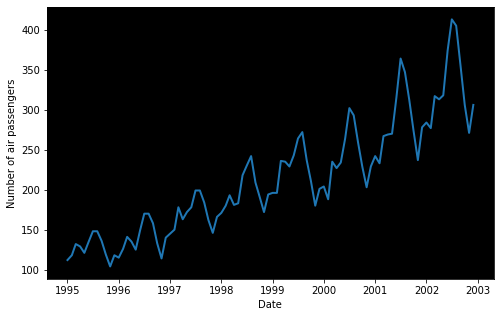

In [363]:
plt.figure(figsize = (8,5))

plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax = plt.axes()
ax.set_facecolor("black")

plt.plot(Airline_data['Passengers'], linewidth = 2)

plt.show()

 Visualization using Histogram ::-

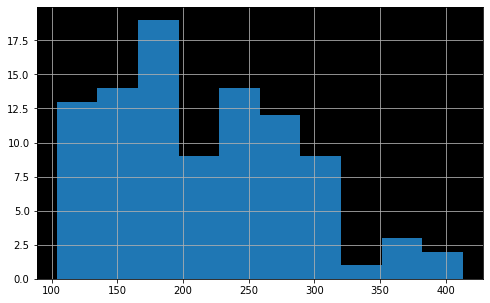

In [364]:
ax = plt.axes()
ax.set_facecolor("black")

Airline_data['Passengers'].hist(figsize = (8,5))

plt.show()

Visualization using Lagplot ::-

In [365]:
from pandas.plotting import lag_plot

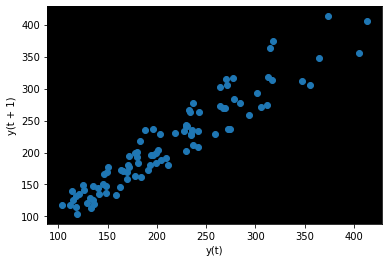

In [366]:
ax = plt.axes()
ax.set_facecolor("black")

lag_plot(Airline_data['Passengers'])

plt.show()

 Visualization using TSA Plot ::-

In [367]:
import statsmodels.graphics.tsaplots as tsa_plots

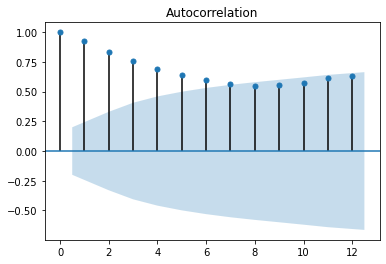

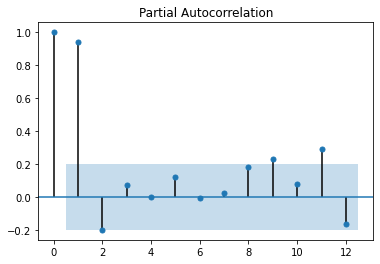

In [368]:
tsa_plots.plot_acf(Airline_data['Passengers'],lags = 12)

tsa_plots.plot_pacf(Airline_data['Passengers'],lags = 12)

plt.show()

#Data Driven Forecasting Methods::-

In [369]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

 Splitting Data ::-

In [370]:
Train = Airline_data.head(84)
Test = Airline_data.tail(12)

 Moving Average Method ::-

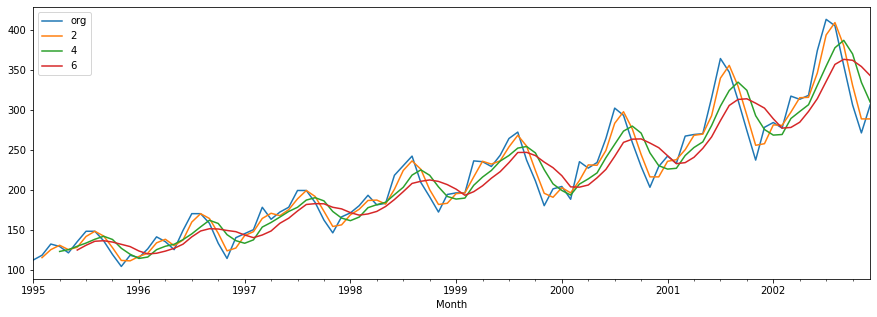

In [371]:
plt.figure(figsize = (15,5))
Airline_data['Passengers'].plot(label = "org")

for i in range(2,8,2):
    Airline_data['Passengers'].rolling(i).mean().plot(label = str(i))
    
plt.legend(loc = 'best')
plt.show()

 Time series decomposition plot::-



In [372]:
from statsmodels.tsa.seasonal import seasonal_decompose

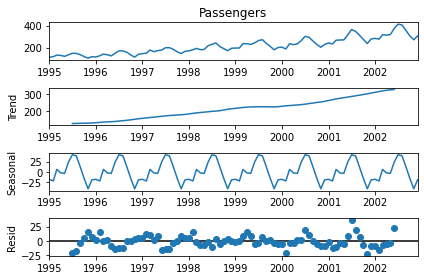

In [373]:
ts_decompose = seasonal_decompose(Airline_data.Passengers,period = 12)
ts_decompose.plot()
plt.show()

 Evaluation Metric RMSE::-

In [374]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [375]:
import warnings
warnings.filterwarnings('ignore')

Simple Exponential Method ::-

In [376]:
simple_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_simple_model = simple_model.predict(start = Test.index[0],end = Test.index[-1])

In [377]:
rmse_simple_model = RMSE(Test.Passengers, pred_simple_model)
print('RMSE Value of Simple Exponential :',rmse_simple_model)

RMSE Value of Simple Exponential : 68.00674031349585


 Holt method ::-

In [378]:
holt_model = Holt(Train["Passengers"]).fit()
pred_holt_model = holt_model.predict(start = Test.index[0],end = Test.index[-1])

In [379]:
rmse_holt_model = RMSE(Test.Passengers, pred_holt_model)
print('RMSE Value of Holt :',rmse_holt_model)

RMSE Value of Holt : 58.57776020000329


 Holts winter exponential smoothing with additive seasonality and additive trend :::-

In [380]:
holt_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal = "add",trend = "add",seasonal_periods = 4).fit()
pred_holt_add_add = holt_model_add_add.predict(start = Test.index[0],end = Test.index[-1])

In [381]:
rmse_holt_add_add_model = RMSE(Test.Passengers, pred_holt_add_add)
print('RMSE Value of Holts add and add :',rmse_holt_add_add_model)

RMSE Value of Holts add and add : 62.91998580421198


 Holts winter exponential smoothing with multiplicative seasonality and additive trend ::-

In [382]:
holt_model_multi_add = ExponentialSmoothing(Train["Passengers"],seasonal = "mul",trend = "add",seasonal_periods = 4).fit() 
pred_holt_multi_add = holt_model_multi_add.predict(start = Test.index[0],end = Test.index[-1])

In [383]:
rmse_holt_model_multi_add_model = RMSE(Test.Passengers, pred_holt_multi_add)
print('RMSE Value of Holts Multi and add :',rmse_holt_model_multi_add_model)

RMSE Value of Holts Multi and add : 64.61261731281522


# Model based Forecasting Methods ::-

Using c standred formate convert datetime to string and extract year and month ::-

In [384]:
Airline["Date"] = pd.to_datetime(Airline["Month"],format="%b-%y")
Airline

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [385]:
Airline["month"] = Airline.Date.dt.strftime("%b") # month extraction
Airline["year"]  = Airline.Date.dt.strftime("%Y") # year extraction

In [386]:
Airline

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,month
0,1995-01-01,112,1995-01-01,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0,Jan
1,1995-02-01,118,1995-02-01,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0,Feb
2,1995-03-01,132,1995-03-01,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0,Mar
3,1995-04-01,129,1995-04-01,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0,Apr
4,1995-05-01,121,1995-05-01,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0,Aug
92,2002-09-01,355,2002-09-01,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1,Sep
93,2002-10-01,306,2002-10-01,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0,Oct
94,2002-11-01,271,2002-11-01,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0,Nov


In [387]:
t= np.arange(1,97)
Airline['t']=t
Airline['t_square']=Airline['t']*Airline['t']
log_Passengers=np.log(Airline['Passengers'])
Airline['log_Passengers']=log_Passengers

In [388]:
Airline = pd.get_dummies(Airline,columns=['month'])

In [389]:
Airline

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,1,4.718499,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,2,4,4.770685,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,3,9,4.882802,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4,16,4.859812,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,5,25,4.795791,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,92,8464,6.003887,0,1,0,...,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,2002,93,8649,5.872118,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,2002,94,8836,5.723585,0,0,0,...,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,2002,95,9025,5.602119,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#Model Building | Training | Testing :-

In [390]:
Train = Airline.head(70)
Test  = Airline.tail(26)

1. Linear model ::-

In [391]:
linear= smf.ols('Passengers~t',data=Train).fit()
pred_lin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
Rmse_lin=np.sqrt((np.mean(np.array(Test['Passengers'])-np.array(pred_lin))**2))
Rmse_lin

17.6818799082118

2. Quadratic Model ::-

In [392]:
quad=smf.ols('Passengers~t+t_square',data=Train).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(Test[['t','t_square']])))
Rmse_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_quad))**2))
Rmse_quad

43.898144967424926

3. Exponential model ::-

In [393]:
expo=smf.ols('log_Passengers~t',data=Train).fit()
pred_exp=pd.Series(expo.predict(pd.DataFrame(Test['t'])))
pred_exp
Rmse_expo=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_exp)))**2))
Rmse_expo

43.47847070446902

4.Additive seasonality ::-

In [394]:
additive = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_add = pd.Series(additive.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
Rmse_add = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add))**2))
Rmse_add

124.97569951828831

5.Additive seasonality with linear trend ::-

In [395]:
addlinear = smf.ols('Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_add_linear = pd.Series(addlinear.predict(Test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

Rmse_add_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_linear))**2))
Rmse_add_linear

34.50208979432828

6.Additive seasonality with quadratic trend ::-

In [396]:
addquad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_add_quad = pd.Series(addquad.predict(Test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

Rmse_add_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_quad))**2))
Rmse_add_quad

30.39304289591983

7.Multiplicative seasonality

In [397]:
mulsea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_mul = pd.Series(mulsea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

Rmse_mul=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mul))**2))
Rmse_mul

298.6798189957354

8.Multiplicative seasonality with linear trend :-

In [398]:
mullin = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_mul_lin = pd.Series(mullin.predict(Test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

Rmse_mul_lin=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mul_lin))**2))
Rmse_mul

298.6798189957354

9.Multiplicative seasonality with quadratic trend ::-

In [399]:
mul_quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(Test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmse_mul_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mul_quad))**2))
rmse_mul_quad

30.39304289591983

Compare RMSE Value ::-

In [400]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
      'Values':pd.Series([rmse_mul_quad,rmseadd,Rmse_add_linear,Rmse_add_quad,Rmse_expo,Rmse_lin,Rmse_mul,Rmse_mul_lin,Rmse_quad])}
table_Rmse=pd.DataFrame(data)

In [401]:
table_Rmse

,Model,Values
0,rmse_mul_quad,30.393043
1,rmseadd,1949.398757
2,rmseaddlinear,34.502090
3,rmseaddquad,30.393043
4,rmseexpo,43.478471
5,rmselin,17.681880
6,rmsemul,298.679819
7,rmsemulin,298.136614
8,rmsequad,43.898145


From above table we can see RMSE for Linear model giving less value, so that is best model